# 1 - EDA<p>
Import libraries and first dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dc_hour = pd.read_csv('dc-data/hour.csv')

## -> DC Dataset

In [4]:
dc_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Per the documentation, these columns have already been normalized.

In [5]:
dc_hour[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


Check the distribution in the columns.<br>
These columns should be (more or less) uniform:

Text(0.5, 1.0, 'Day of the Week')

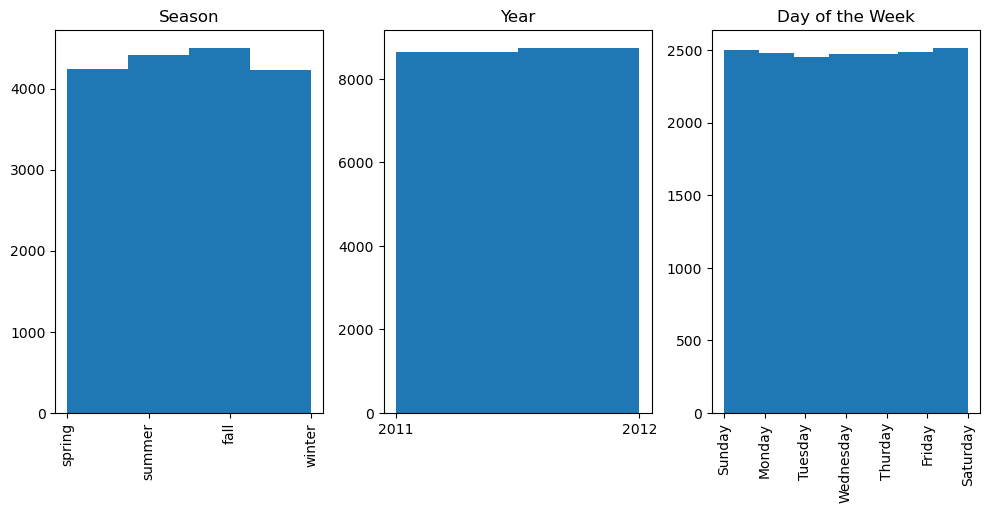

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(dc_hour['season'],bins=4)
plt.tight_layout()
plt.title('Season')
plt.xticks(np.arange(1,5,1),labels=(['spring','summer','fall','winter']),rotation=90)

plt.subplot(1,3,2)
plt.hist(dc_hour['yr'],bins=2)
plt.tight_layout()
plt.title('Year')
plt.xticks(np.arange(0,2,1),labels=(['2011','2012']))

plt.subplot(1,3,3)
plt.hist(dc_hour['weekday'],bins=7)
plt.tight_layout
plt.xticks(np.arange(0,7,1),labels=(['Sunday','Monday','Tuesday','Wednesday','Thurday','Friday','Saturday']),rotation=90)
plt.title('Day of the Week')

Text(0.5, 1.0, 'Hours (24 hr clock)')

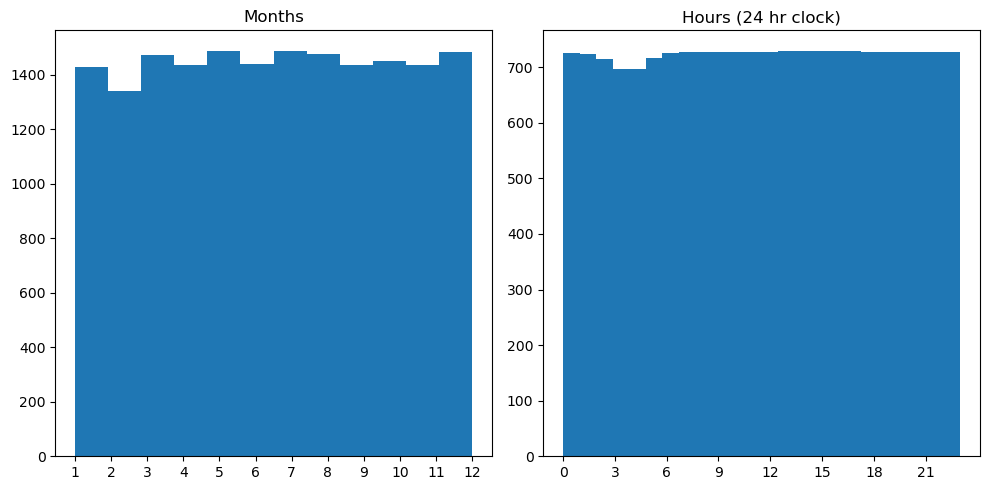

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(dc_hour['mnth'],bins=12)
plt.xticks(np.arange(1,13,1))
plt.tight_layout()
plt.title('Months')

plt.subplot(1,2,2)
plt.hist(dc_hour['hr'],bins=24)
plt.xticks(np.arange(0,24,3))
plt.tight_layout()
plt.title('Hours (24 hr clock)')

Hours should be completely uniform. Investigation shows that some dates are indeed missing some hours, and also that there are no hours that show 0 rentals. 

In [8]:
dc_hour[dc_hour['cnt']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [9]:
# missing hour 5 
dc_hour[dc_hour['dteday']=='2011-01-02'][['dteday','hr']]

,dteday,hr
24,2011-01-02,0
25,2011-01-02,1
26,2011-01-02,2
27,2011-01-02,3
28,2011-01-02,4
29,2011-01-02,6
30,2011-01-02,7
31,2011-01-02,8
32,2011-01-02,9
33,2011-01-02,10


This leads me to conclude that the missing hours are ones where no rentals occured. In order for this data to be complete, I'm going to have to fill in those missing hours. 

Categorical columns with yes/no values, unlikely to be uniformly distributed:


Text(0.5, 1.0, 'Weather Severity')

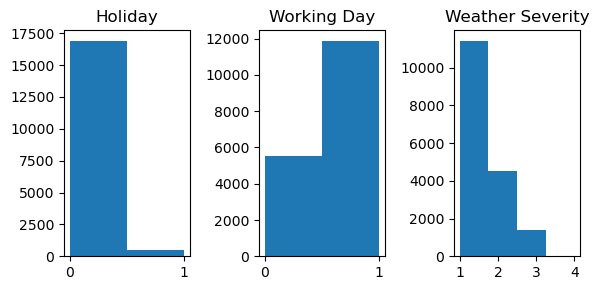

In [10]:
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
plt.hist(dc_hour['holiday'],bins=2)
plt.tight_layout()
plt.title('Holiday')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,2)
plt.hist(dc_hour['workingday'],bins=2)
plt.tight_layout()
plt.title('Working Day')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,3)
plt.hist(dc_hour['weathersit'],bins=4)
plt.tight_layout()
plt.xticks(np.arange(1,5,1))
plt.title('Weather Severity')

In [11]:
dc_hour[dc_hour['weathersit']==4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


There *are* values for weather severity 4, but very, very few. 

Columns that have already been normalized, per the documentation:

Text(0.5, 1.0, 'Windspeed (normalized)')

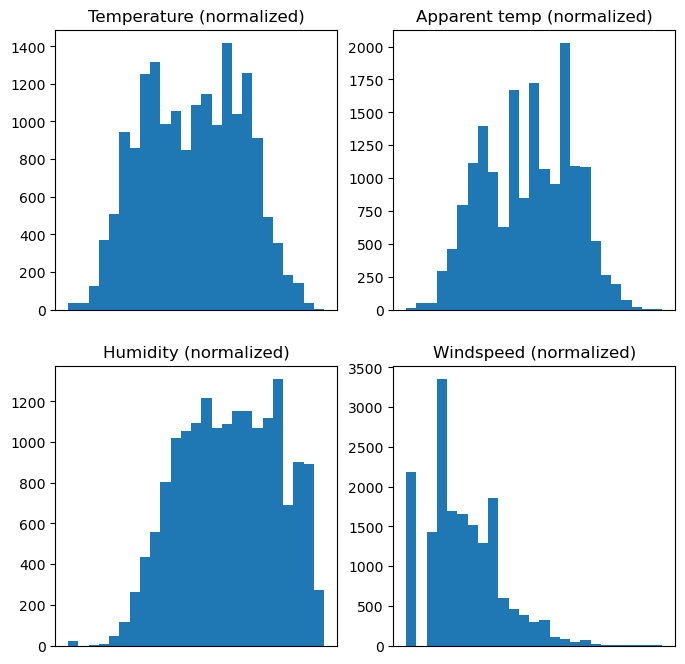

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.hist(dc_hour['temp'],bins=25)
plt.xticks([])
plt.title('Temperature (normalized)')

plt.subplot(2,2,2)
plt.hist(dc_hour['atemp'],bins=25)
plt.xticks([])
plt.title('Apparent temp (normalized)')

plt.subplot(2,2,3)
plt.hist(dc_hour['hum'],bins=25)
plt.xticks([])
plt.title('Humidity (normalized)')

plt.subplot(2,2,4)
plt.hist(dc_hour['windspeed'],bins=25)
plt.xticks([])
plt.title('Windspeed (normalized)')

All of these columns have approximately normal distributions.

Distribution of target variable:<br>
(I will not be using casual vs registered renters; they are redundant and don't exist in the other dataset I want to try.)

Text(0.5, 1.0, 'Bikes rented')

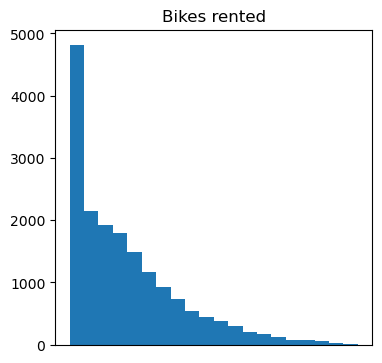

In [13]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,4)
plt.hist(dc_hour['cnt'],bins=20)
plt.xticks([])
plt.title('Bikes rented')

The overall count is also a mostly normal distribution, taking in to account the fact that it cannot be negative, and I have not added the 0 rows back in yet. 

Variable combinations that showed apparent correlation:

([], [])

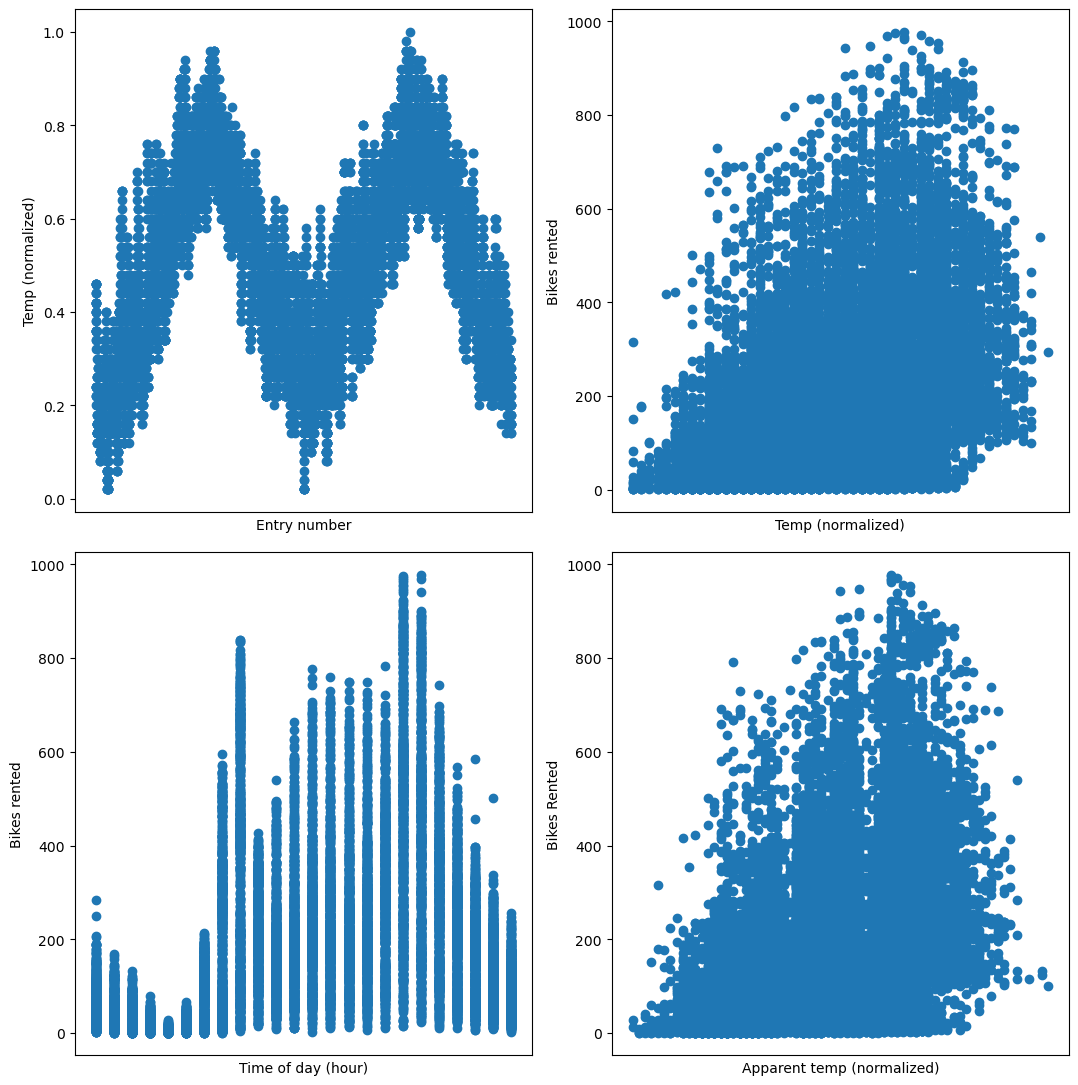

In [14]:
plt.figure(figsize=(11,11))
plt.subplot(2,2,1)
plt.tight_layout()
plt.scatter(x=dc_hour['instant'],y=dc_hour['temp'])
plt.xlabel('Entry number')
plt.xticks([])
plt.ylabel('Temp (normalized)',rotation=90)


plt.subplot(2,2,2)
plt.tight_layout()
plt.scatter(x=dc_hour['temp'],y=dc_hour['cnt'])
plt.xlabel('Temp (normalized)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)

plt.subplot(2,2,3)
plt.tight_layout()
plt.scatter(x=dc_hour['hr'],y=dc_hour['cnt'])
plt.xlabel('Time of day (hour)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)

plt.subplot(2,2,4)
plt.tight_layout()
plt.scatter(x=dc_hour['atemp'],y=dc_hour['cnt'])
plt.xlabel('Apparent temp (normalized)')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])

Unsurprisingly, there appears to be correlations between temperature factors and bike rentals, as well as the time of day.

In [15]:
print('Correlation coefficients:')
print('Bikes rented and Temperature:\n',np.corrcoef(dc_hour['cnt'],dc_hour['temp']))
print('Bikes rented and Apparent temperature:\n',np.corrcoef(dc_hour['cnt'],dc_hour['atemp']))
print('Bikes rented and Hour:\n',np.corrcoef(dc_hour['cnt'],dc_hour['hr']))

Correlation coefficients:
Bikes rented and Temperature:
 [[1.         0.40477228]
 [0.40477228 1.        ]]
Bikes rented and Apparent temperature:
 [[1.        0.4009293]
 [0.4009293 1.       ]]
Bikes rented and Hour:
 [[1.        0.3940715]
 [0.3940715 1.       ]]


## -> London Dataset<p>
Import second dataset

In [16]:
london = pd.read_csv('london-data/london_merged.csv')

In [17]:
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


The columns are not identical to the other dataset, but the same data is present and can be extracted. `t1` is the same as `temp` while `t2` is the same as `atemp`. Weather is encoded differently, per the documentation, and will need to be standardized.

In [18]:
london[['t1','t2','hum','wind_speed']].describe()

,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000
mean,12.468091,11.520836,72.324954,15.913063
std,5.571818,6.615145,14.313186,7.894570
min,-1.500000,-6.000000,20.500000,0.000000
25%,8.000000,6.000000,63.000000,10.000000
50%,12.500000,12.500000,74.500000,15.000000
75%,16.000000,16.000000,83.000000,20.500000
max,34.000000,34.000000,100.000000,56.500000


In this dataset, these columns are not already normalized. 

Check the distribution in the columns.<br>
Season should still be close to uniform:

(array([4394., 4387., 4303., 4330.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

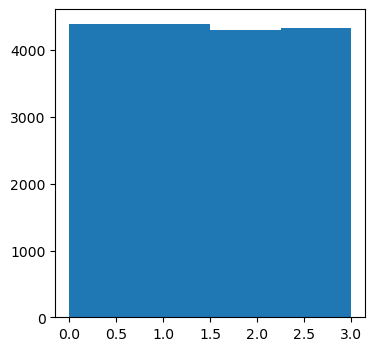

In [19]:
plt.figure(figsize=(4,4))
plt.hist(london['season'],bins=4)

Categorical columns, likely to be skewed:

([<matplotlib.axis.XTick at 0x2535f39b1a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

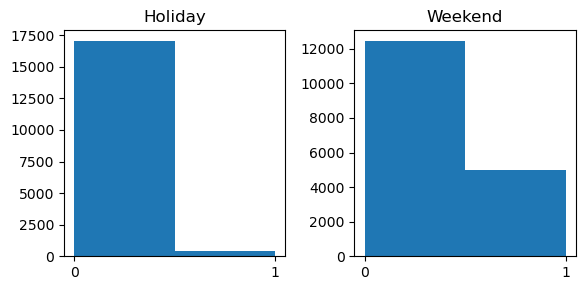

In [20]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(london['is_holiday'],bins=2)
plt.tight_layout()
plt.title('Holiday')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,2,2)
plt.hist(london['is_weekend'],bins=2)
plt.tight_layout()
plt.title('Weekend')
plt.xticks(np.arange(0,2,1))

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

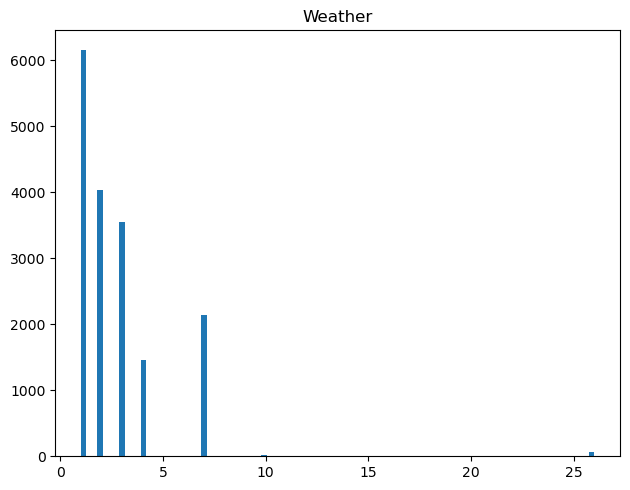

In [21]:
plt.hist(london['weather_code'],bins=94)
plt.tight_layout()
plt.title('Weather')
plt.xticks()

_(This has to look weird because the values used to encode are 1-4, 7, 10, 26 and 94, and 94 is never used.)_

In [22]:
london[london['weather_code']==94]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


Columns to normalize to match the other dataset:

Text(0.5, 1.0, 'Windspeed')

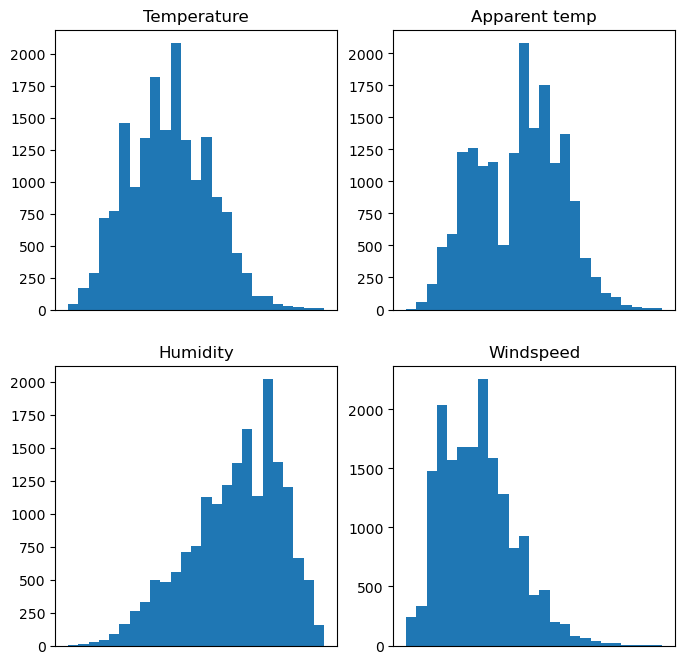

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.hist(london['t1'],bins=25)
plt.xticks([])
plt.title('Temperature')

plt.subplot(2,2,2)
plt.hist(london['t2'],bins=25)
plt.xticks([])
plt.title('Apparent temp')

plt.subplot(2,2,3)
plt.hist(london['hum'],bins=25)
plt.xticks([])
plt.title('Humidity')

plt.subplot(2,2,4)
plt.hist(london['wind_speed'],bins=25)
plt.xticks([])
plt.title('Windspeed')

These also have fairly normal distributions. 

Distribution of the target variable:

Text(0.5, 1.0, 'Bikes rented')

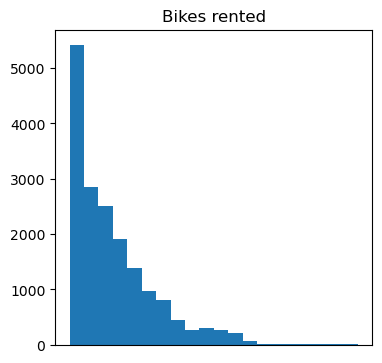

In [24]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,4)
plt.hist(london['cnt'],bins=20)
plt.xticks([])
plt.title('Bikes rented')

Again, fairly normal given the value cannot be negative. I will need to check if there are any missing rows in this dataset, but with no preexisting `hour` column, that will have to happen later.

([], [])

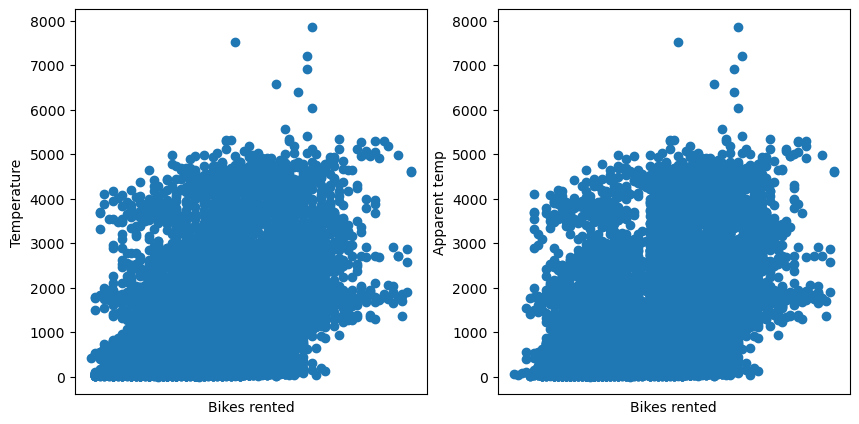

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=london['t1'],y=london['cnt'])
plt.xticks([])
plt.ylabel('Temperature',rotation=90)
plt.xlabel('Bikes rented')

plt.subplot(1,2,2)
plt.scatter(x=london['t2'],y=london['cnt'])
plt.xlabel('Bikes rented')
plt.ylabel('Apparent temp',rotation=90)
plt.xticks([])

This data does not show the same apparent correlation as the DC data does.

In [32]:
print('Correlation coefficients:')
print('Bikes rented and Temperature:\n',np.corrcoef(london['cnt'],london['t1']))
print('Bikes rented and Apparent temperature:\n',np.corrcoef(london['cnt'],london['t2']))

Correlation coefficients:
Bikes rented and Temperature:
 [[1.         0.38879845]
 [0.38879845 1.        ]]
Bikes rented and Apparent temperature:
 [[1.         0.36903479]
 [0.36903479 1.        ]]


The correlation coefficients **are** lower than in the DC set, but not by much. 

Investigate to see if there are missing hours.

In [33]:
london[london['cnt']==0]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0


In [35]:
london.shape

(17414, 10)

In [36]:
17414/24

725.5833333333334

The fact that the number of rows cannot be divided by 24 means there almost certainly are missing rows. Interestingly, unlike in the DC data, there **is** a row with a 0 in the `cnt` column. 